<a href="https://colab.research.google.com/github/Chinmaya-3141/Capstone-Project/blob/main/Capstone_Classification_EfficientNetB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EfficientNet-B4**

## Install and import necessary libraries

In [ ]:
!python --version
!pip show torch

Python 3.9.16
Name: torch
Version: 1.13.1+cu116
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.9/dist-packages
Requires: typing-extensions
Required-by: fastai, torchaudio, torchtext, torchvision



Python 3.9.16\
Name: torch\
Version: 1.13.1+cu116\
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration\
Home-page: https://pytorch.org/\
Author: PyTorch Team\
Author-email: packages@pytorch.org\
License: BSD-3\
Location: /usr/local/lib/python3.9/dist-packages\
Requires: typing-extensions\
Required-by: fastai, torchaudio, torchtext, torchvision\


In [ ]:
!pip install torchinfo -qq
!pip install efficientnet_pytorch -qq

  Preparing metadata (setup.py) ... done


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
from numba import cuda
import PIL
from time import time

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchsummary import summary as tssum
from torchinfo import summary as tisum

In [ ]:
# from torchvision.models import efficientnet_b7 as en7
from efficientnet_pytorch import EfficientNet as en4

## Import and transform data

In [ ]:
path = '/content/drive/MyDrive/Capstone Data (Shared)/Capstone Data/Resized Data/Resized Data_320x320'

In [ ]:
# Define the transform for the data
# Try fitting model without augmenting pneumonia data

transform = transforms.Compose([
    transforms.Resize((380,380)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
datavar = ImageFolder(root=path, transform=transform)

In [ ]:
train_data, test_data = torch.utils.data.random_split(datavar, [int(0.8*len(datavar)), len(datavar)-int(0.8*len(datavar))])

In [ ]:
# Define the data loaders

train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batchsize, shuffle=False)

## Modelling

In [ ]:
batchsize = 20

In [ ]:
dimension=380

In [ ]:
channels = 3

In [ ]:
# Check if GPU is available

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# EfficientNetB7 requires 600*600 images

model = en4.from_pretrained('efficientnet-b4', num_classes=3)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth


  0%|          | 0.00/74.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b4


In [ ]:
# Load the model to device

model.to(device)

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [ ]:
# Display the summary of the model

print(tssum(model, input_size=(channels,dimension,dimension)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 381, 381]               0
Conv2dStaticSamePadding-2         [-1, 48, 190, 190]           1,296
       BatchNorm2d-3         [-1, 48, 190, 190]              96
MemoryEfficientSwish-4         [-1, 48, 190, 190]               0
         ZeroPad2d-5         [-1, 48, 192, 192]               0
Conv2dStaticSamePadding-6         [-1, 48, 190, 190]             432
       BatchNorm2d-7         [-1, 48, 190, 190]              96
MemoryEfficientSwish-8         [-1, 48, 190, 190]               0
          Identity-9             [-1, 48, 1, 1]               0
Conv2dStaticSamePadding-10             [-1, 12, 1, 1]             588
MemoryEfficientSwish-11             [-1, 12, 1, 1]               0
         Identity-12             [-1, 12, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 48, 1, 1]             624
         I

In [ ]:
print(tisum(\
            model,\
            input_size = (batchsize,channels,dimension,dimension)\
            )\
      )

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet                                       [20, 3]                   --
├─Conv2dStaticSamePadding: 1-1                     [20, 48, 190, 190]        1,296
│    └─ZeroPad2d: 2-1                              [20, 3, 381, 381]         --
├─BatchNorm2d: 1-2                                 [20, 48, 190, 190]        96
├─MemoryEfficientSwish: 1-3                        [20, 48, 190, 190]        --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock: 2-2                            [20, 24, 190, 190]        --
│    │    └─Conv2dStaticSamePadding: 3-1           [20, 48, 190, 190]        432
│    │    └─BatchNorm2d: 3-2                       [20, 48, 190, 190]        96
│    │    └─MemoryEfficientSwish: 3-3              [20, 48, 190, 190]        --
│    │    └─Conv2dStaticSamePadding: 3-4           [20, 12, 1, 1]            588
│    │    └─MemoryEfficientSwi

In [ ]:
learning_rate=1e-4

In [ ]:
criterion = nn.CrossEntropyLoss()
# lr_decay=0.99
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
history_accuracy=[]
history_loss=[]
epochs = 11

In [ ]:
#Create a class list

eye = torch.eye(3).to(device)
classes=[0,1,2]

In [ ]:
# Train the model

for epoch in range(epochs):  
    running_loss = 0.0
    correct=0
    total=0
    class_correct = list(0. for _ in classes)
    class_total = list(0. for _ in classes)
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        t0 = time()
        inputs, labels = inputs.to(device), labels.to(device)
        labels = eye[labels]
        optimizer.zero_grad()
        #torch.cuda.empty_cache()
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(labels, 1)
        c = (predicted == labels.data).squeeze()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        accuracy = float(correct) / float(total)
        
        history_accuracy.append(accuracy)
        history_loss.append(loss)
        
        loss.backward()
        optimizer.step()
        
        for j in range(labels.size(0)):
            label = labels[j]
            class_correct[label] += c[j].item()
            class_total[label] += 1
        
        running_loss += loss.item()
        
        print( "Epoch : ",epoch+1," Batch : ", i+1," Loss :  ",running_loss/(i+1)," Accuracy : ",accuracy,"Time ",round(time()-t0, 2),"s" )
    for k in range(len(classes)):
        if(class_total[k]!=0):
            print('Accuracy of %5s : %2d %%' % (classes[k], 100 * class_correct[k] / class_total[k]))
        
    print('[%d epoch] Accuracy of the network on the Training images: %d %%' % (epoch+1, 100 * correct / total))
    
    if epoch%3==0 or epoch==0:
        file=f"EN4-epoch {epoch+1} model.pth"
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, file)
        
file=f"EN4-epoch {epoch+1} model.pth"
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, file)

Epoch :  1  Batch :  1  Loss :   1.115805983543396  Accuracy :  0.35 Time  1.84 s
Epoch :  1  Batch :  2  Loss :   1.115351378917694  Accuracy :  0.325 Time  1.04 s
Epoch :  1  Batch :  3  Loss :   1.090968648592631  Accuracy :  0.4166666666666667 Time  1.03 s
Epoch :  1  Batch :  4  Loss :   1.076417326927185  Accuracy :  0.45 Time  1.07 s
Epoch :  1  Batch :  5  Loss :   1.0653160572052003  Accuracy :  0.46 Time  1.03 s
Epoch :  1  Batch :  6  Loss :   1.0623130400975545  Accuracy :  0.4583333333333333 Time  1.06 s
Epoch :  1  Batch :  7  Loss :   1.0481503009796143  Accuracy :  0.4785714285714286 Time  1.06 s
Epoch :  1  Batch :  8  Loss :   1.0339316800236702  Accuracy :  0.51875 Time  1.07 s
Epoch :  1  Batch :  9  Loss :   1.0220649242401123  Accuracy :  0.5388888888888889 Time  1.06 s
Epoch :  1  Batch :  10  Loss :   1.0070029199123383  Accuracy :  0.57 Time  1.06 s
Epoch :  1  Batch :  11  Loss :   1.0000828883864663  Accuracy :  0.5772727272727273 Time  1.04 s
Epoch :  1  Bat

## Visualisation of accuracy and loss

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist_loss = []
for i in history_loss:
  j=i.cpu().detach().numpy()
  hist_loss.append(j)

In [ ]:
hist_loss

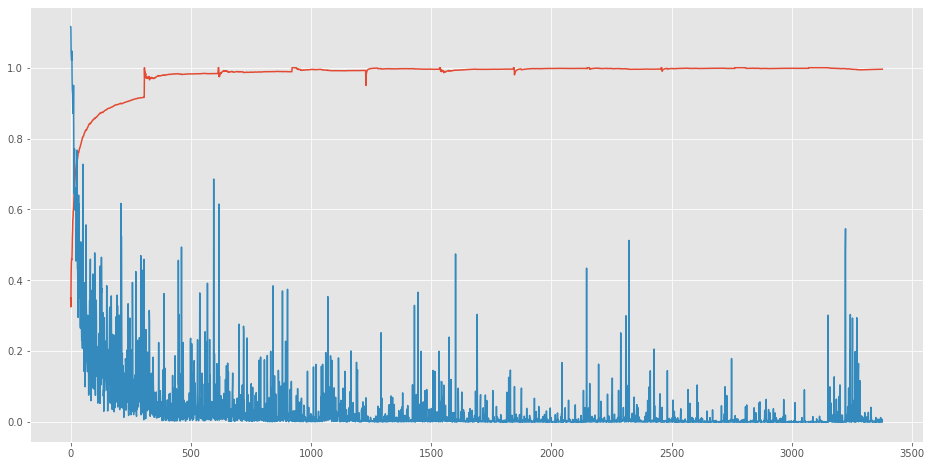

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,8))
plt.plot(history_accuracy)
plt.plot(hist_loss)

In [ ]:
plt.savefig("LossAndAccuracy",dpi=2048, format = png)

## Model Evaluation

In [ ]:
model.eval()

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [ ]:
# Evaluate the model on test data

correct = 0
total = 0
predictions=[]
actuals=[]
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pred_arr = predicted.cpu().detach().numpy()
        actual_arr = labels.cpu().detach().numpy()
        predictions.append(pred_arr)
        actuals.append(actual_arr)

print('Accuracy of the network on the test images: %f %%'% (100 * correct / total))

Accuracy of the network on the test images: 99.282453 %


In [ ]:
pred=np.concatenate(predictions)
act=np.concatenate(actuals)

In [ ]:
pred_arr = predicted.cpu().detach().numpy()
actual_arr = labels.cpu().detach().numpy()

In [ ]:
pd.crosstab(pred,act,rownames=['Predicted'], colnames=['Actual'])

Actual,0,1,2
Predicted,,,
0,702,2,0
1,0,576,3
2,1,5,244


In [ ]:
datavar.classes

['Covid', 'Normal', 'Pneumonia']

In [ ]:
datavar.class_to_idx

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

## Load pretrained model into file

In [ ]:
file = '/content/EN4-epoch 10 model.pth'

In [ ]:
checkpoint = torch.load(file)

In [ ]:
model2 = en4.from_pretrained('efficientnet-b4', num_classes=3)

Loaded pretrained weights for efficientnet-b4


In [ ]:
optimizer2 = optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
model2.load_state_dict(checkpoint['model_state_dict'])
optimizer2.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint["epoch"]
loss = checkpoint['loss']

In [ ]:
file_save = '/content/drive/MyDrive/Import to Colab/Models/E4-10epoch-batch16.pth'
# '/content/drive/MyDrive/Capstone Data (Shared)/Capstone Data/TrainedModelCheckpoints/E4-10epoch-batch16.pth'

In [ ]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, file_save)

In [ ]:
# Evaluate the model on test data

correct2 = 0
total2 = 0
predictions2=[]
actuals2=[]
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs.data, 1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()
        pred_arr2 = predicted.cpu().detach().numpy()
        actual_arr2 = labels.cpu().detach().numpy()
        predictions2.append(pred_arr2)
        actuals2.append(actual_arr2)

print('Accuracy of the network on the test images: %f %%'% (100 * correct2 / total2))

Accuracy of the network on the test images: 99.282453 %


In [ ]:
pred2=np.concatenate(predictions2)
act2=np.concatenate(actuals2)

In [ ]:
pred_arr2 = predicted.cpu().detach().numpy()
actual_arr2 = labels.cpu().detach().numpy()

In [ ]:
pd.crosstab(pred2,act2,rownames=['Predicted'], colnames=['Actual'])

Actual,0,1,2
Predicted,,,
0,702,2,0
1,0,576,3
2,1,5,244
